In [ ]:
Image Compression using Singular Value Decomposition (SVD)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


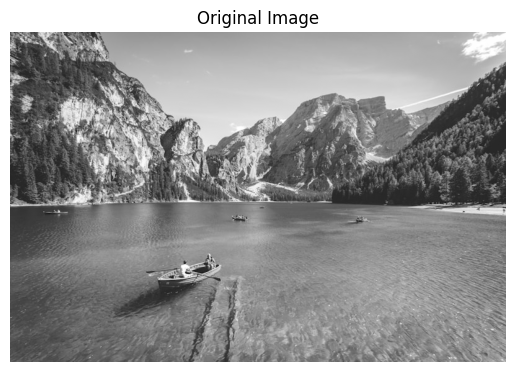

Image matrix shape: (533, 800)


In [6]:
img = Image.open('mountain.jpeg').convert('L')
img_matrix = np.array(img)

plt.imshow(img_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

print("Image matrix shape:", img_matrix.shape)


In [7]:
U, S, Vt = np.linalg.svd(img_matrix, full_matrices=False)
print("Shapes -> U:", U.shape, "S:", S.shape, "Vt:", Vt.shape)


Shapes -> U: (533, 533) S: (533,) Vt: (533, 800)


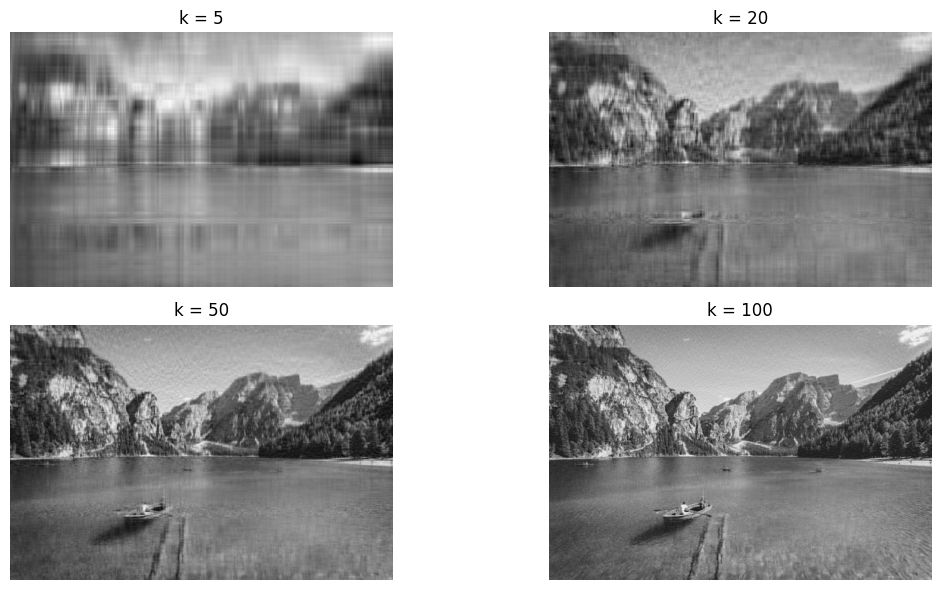

In [8]:
def reconstruct_image(k):
    """Reconstruct image using top-k singular values."""
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

ks = [5, 20, 50, 100]

plt.figure(figsize=(12,6))
for i, k in enumerate(ks):
    plt.subplot(2, 2, i+1)
    img_reconstructed = reconstruct_image(k)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()
